In [18]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

sns.set(style="whitegrid")

In [19]:
from google.colab import files


uploaded = files.upload()


Saving Student Mental health.csv to Student Mental health (1).csv


In [20]:
df = pd.read_csv("Student Mental health (1).csv")
df.head(5)


,Timestamp,Choose your gender,Age,What is your course?,Your current year of Study,What is your CGPA?,Marital status,Do you have Depression?,Do you have Anxiety?,Do you have Panic attack?,Did you seek any specialist for a treatment?
0,8/7/2020 12:02,Female,18.0,Engineering,year 1,3.00 - 3.49,No,Yes,No,Yes,No
1,8/7/2020 12:04,Male,21.0,Islamic education,year 2,3.00 - 3.49,No,No,Yes,No,No
2,8/7/2020 12:05,Male,19.0,BIT,Year 1,3.00 - 3.49,No,Yes,Yes,Yes,No
3,8/7/2020 12:06,Female,22.0,Laws,year 3,3.00 - 3.49,Yes,Yes,No,No,No
4,8/7/2020 12:13,Male,23.0,Mathemathics,year 4,3.00 - 3.49,No,No,No,No,No


In [21]:
df.shape


(101, 11)

In [22]:
df.info()


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 101 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                                        Non-Null Count  Dtype  
---  ------                                        --------------  -----  
 0   Timestamp                                     101 non-null    object 
 1   Choose your gender                            101 non-null    object 
 2   Age                                           100 non-null    float64
 3   What is your course?                          101 non-null    object 
 4   Your current year of Study                    101 non-null    object 
 5   What is your CGPA?                            101 non-null    object 
 6   Marital status                                101 non-null    object 
 7   Do you have Depression?                       101 non-null    object 
 8   Do you have Anxiety?                          101 non-null    object 
 9   Do you have Panic attack?                     101 non-null    obj

In [23]:
df.isna().sum()


Timestamp                                       0
Choose your gender                              0
Age                                             1
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64

In [24]:
df.dropna(inplace=True)
df.isna().sum()

Timestamp                                       0
Choose your gender                              0
Age                                             0
What is your course?                            0
Your current year of Study                      0
What is your CGPA?                              0
Marital status                                  0
Do you have Depression?                         0
Do you have Anxiety?                            0
Do you have Panic attack?                       0
Did you seek any specialist for a treatment?    0
dtype: int64

In [25]:
columns_names = ['Timestamp', 'Gender', 'Age', 'Course', 'Year of Study', 'CGPA', 'Is Married?', 'Has Depression?','Has Anxiety?', 'Has Panic Attacks?', 'Is Undergoing Treatment?']
df.columns = columns_names
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 0 to 100
Data columns (total 11 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Timestamp                 100 non-null    object 
 1   Gender                    100 non-null    object 
 2   Age                       100 non-null    float64
 3   Course                    100 non-null    object 
 4   Year of Study             100 non-null    object 
 5   CGPA                      100 non-null    object 
 6   Is Married?               100 non-null    object 
 7   Has Depression?           100 non-null    object 
 8   Has Anxiety?              100 non-null    object 
 9   Has Panic Attacks?        100 non-null    object 
 10  Is Undergoing Treatment?  100 non-null    object 
dtypes: float64(1), object(10)
memory usage: 9.4+ KB


**AGE**

In [26]:
df['Age'].dtype
df['Age'] = df['Age'].astype(int)
df['Age'].dtype

dtype('int64')

In [27]:
df['Year of Study'].unique()

array(['year 1', 'year 2', 'Year 1', 'year 3', 'year 4', 'Year 2',
       'Year 3'], dtype=object)

**Notice how there is different capitalization for string indicating the same value i.e. 'Year 1' and 'year 1'. I personally found out the best method for me is to change the Year of Study column to an integer type containing just the Year**

In [28]:
df['Year of Study'] = df['Year of Study'].str.split().str[1].astype(int)
df['Year of Study'].unique()

array([1, 2, 3, 4])

CGPA

In [30]:
df['CGPA'].unique()

array(['3.00 - 3.49', '3.50 - 4.00', '3.50 - 4.00 ', '2.50 - 2.99',
       '2.00 - 2.49', '0 - 1.99'], dtype=object)

In [31]:
df['CGPA'] = df['CGPA'].str.strip()
df['CGPA'].unique()

array(['3.00 - 3.49', '3.50 - 4.00', '2.50 - 2.99', '2.00 - 2.49',
       '0 - 1.99'], dtype=object)

Student Condition

In [33]:
depressed_filter = df['Has Depression?'] == 'Yes'
anxiety_filter = df['Has Anxiety?'] == 'Yes'
panicking_filter = df['Has Panic Attacks?'] == 'Yes'
conditions_filter = anxiety_filter | depressed_filter | panicking_filter
no_conditions_filter = ~depressed_filter & ~anxiety_filter & ~panicking_filter

After creating some filters, I added a new column called Has Condition? to indicate wheter a Student is affected or not by a condition.

In [34]:
df['Has Condition?'] = np.where(conditions_filter, 'Yes',"No")
df

,Timestamp,Gender,Age,Course,Year of Study,CGPA,Is Married?,Has Depression?,Has Anxiety?,Has Panic Attacks?,Is Undergoing Treatment?,Has Condition?
0,8/7/2020 12:02,Female,18,Engineering,1,3.00 - 3.49,No,Yes,No,Yes,No,Yes
1,8/7/2020 12:04,Male,21,Islamic education,2,3.00 - 3.49,No,No,Yes,No,No,Yes
2,8/7/2020 12:05,Male,19,BIT,1,3.00 - 3.49,No,Yes,Yes,Yes,No,Yes
3,8/7/2020 12:06,Female,22,Laws,3,3.00 - 3.49,Yes,Yes,No,No,No,Yes
4,8/7/2020 12:13,Male,23,Mathemathics,4,3.00 - 3.49,No,No,No,No,No,No
...,...,...,...,...,...,...,...,...,...,...,...,...
96,13/07/2020 19:56:49,Female,21,BCS,1,3.50 - 4.00,No,No,Yes,No,No,Yes
97,13/07/2020 21:21:42,Male,18,Engineering,2,3.00 - 3.49,No,Yes,Yes,No,No,Yes
98,13/07/2020 21:22:56,Female,19,Nursing,3,3.50 - 4.00,Yes,Yes,No,Yes,No,Yes
99,13/07/2020 21:23:57,Female,23,Pendidikan Islam,4,3.50 - 4.00,No,No,No,No,No,No


Created a new column called Condition.

For each condition (Has Depression, Has Anxiety or Has Panic Attacks) a student has, a letter (A = Anxiety, D = Depression and P = Panic Attacks) gets appended to the Condition column making it easier to keep track and filter data.

In [35]:
df['Condition'] = ''
df.loc[anxiety_filter, 'Condition'] += 'A'
df.loc[depressed_filter, 'Condition'] += 'D'
df.loc[panicking_filter, 'Condition'] += 'P'
df.loc[no_conditions_filter, 'Condition'] += 'None'

df

,Timestamp,Gender,Age,Course,Year of Study,CGPA,Is Married?,Has Depression?,Has Anxiety?,Has Panic Attacks?,Is Undergoing Treatment?,Has Condition?,Condition
0,8/7/2020 12:02,Female,18,Engineering,1,3.00 - 3.49,No,Yes,No,Yes,No,Yes,DP
1,8/7/2020 12:04,Male,21,Islamic education,2,3.00 - 3.49,No,No,Yes,No,No,Yes,A
2,8/7/2020 12:05,Male,19,BIT,1,3.00 - 3.49,No,Yes,Yes,Yes,No,Yes,ADP
3,8/7/2020 12:06,Female,22,Laws,3,3.00 - 3.49,Yes,Yes,No,No,No,Yes,D
4,8/7/2020 12:13,Male,23,Mathemathics,4,3.00 - 3.49,No,No,No,No,No,No,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...
96,13/07/2020 19:56:49,Female,21,BCS,1,3.50 - 4.00,No,No,Yes,No,No,Yes,A
97,13/07/2020 21:21:42,Male,18,Engineering,2,3.00 - 3.49,No,Yes,Yes,No,No,Yes,AD
98,13/07/2020 21:22:56,Female,19,Nursing,3,3.50 - 4.00,Yes,Yes,No,Yes,No,Yes,DP
99,13/07/2020 21:23:57,Female,23,Pendidikan Islam,4,3.50 - 4.00,No,No,No,No,No,No,None


**Initial Data Visualization and Analysis**
<br>
The goal here is to visualize some simple key aspect of the dataframe without manipulating too much data.
<br>
<br>
**Students by Gender**


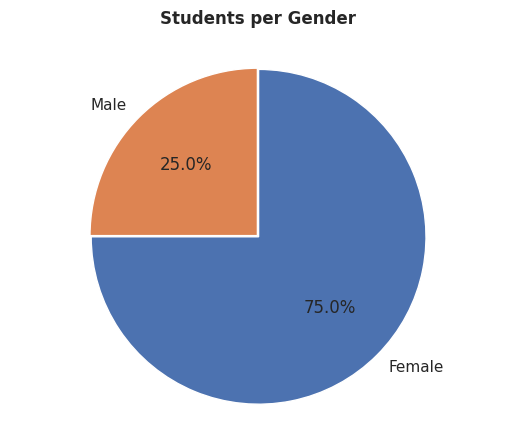

In [36]:
labels = df['Gender'].value_counts().index

plt.pie(df['Gender'].value_counts(),labels=labels, autopct='%1.1f%%',startangle=180, explode=(0.005,0.005))
plt.axis('equal')
plt.title('Students per Gender', fontsize=12, fontweight='bold', pad=20)
plt.show()

**Students by Year of Study**

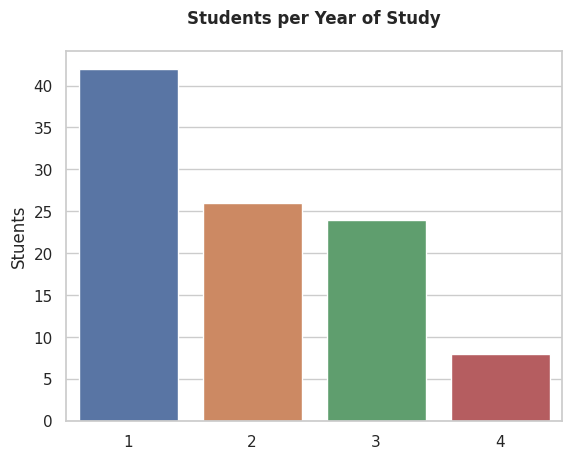

In [37]:
sns.countplot(data=df, x='Year of Study').set(xlabel=None, ylabel='Stuents')
plt.title('Students per Year of Study', fontsize=12, fontweight='bold', pad=20)
sns.color_palette("pastel")

plt.show()

**Students by CGPA**

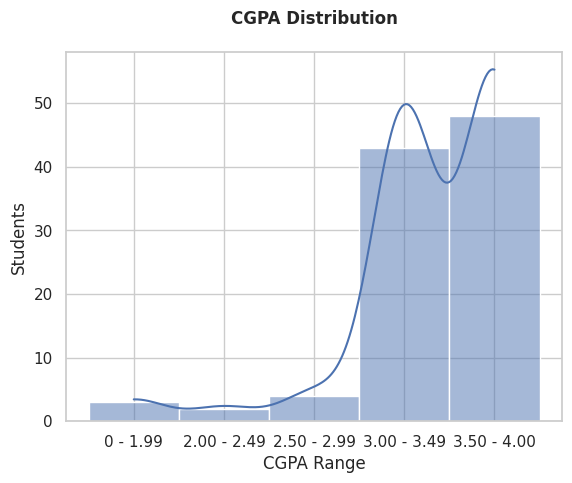

In [38]:
sns.histplot(df['CGPA'].sort_values(), kde=True)
plt.xlabel('CGPA Range')
plt.ylabel('Students')
plt.title('CGPA Distribution', fontsize=12, fontweight='bold', pad=20)
plt.show()

Student by AGE

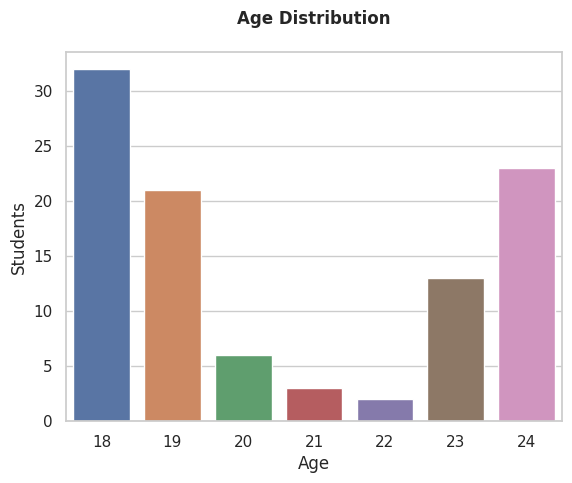

In [39]:
sns.countplot(data=df, x='Age')
plt.xlabel('Age')
plt.ylabel('Students')
plt.title('Age Distribution', fontsize=12, fontweight='bold', pad=20)

plt.show()

## **Initial Analysis Findings**

In this initial analysis about the basic structure of the dataset, we have noticed four key observations:

1. **Gender Ratio:** The dataset shows a gender ratio of approximately 3 female students to 1 male student.

2. **Year of Study Distribution:** The majority of the students in the dataset are from Year 1. Year 2 and Year 3 have a relatively similar number of students, while Year 4 represents a smaller portion, comprising only 8% of the entire dataset.

3. **CGPA Distribution:** It is observed that most of the students have a high CGPA of over 3+.

4. **Age**: There is a substantial amount of student in the 18-19 and the 23-24 age range.

# **Exploratory Data Analysis**

In [40]:
df_condition = df[df['Has Condition?'] == 'Yes']

## **Finding the most common condition**

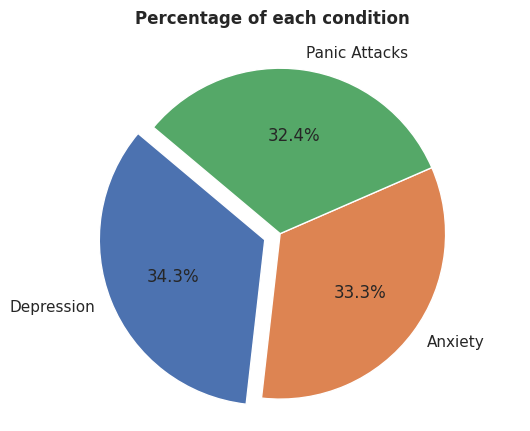

In [42]:
total_entries = len(df_condition)
percentage_depression = (df_condition['Has Depression?'].value_counts()['Yes'] / total_entries) * 100
percentage_anxiety = (df_condition['Has Anxiety?'].value_counts()['Yes'] / total_entries) * 100
percentage_panic_attacks = (df_condition['Has Panic Attacks?'].value_counts()['Yes'] / total_entries) * 100

# Create a pie chart
labels = ['Depression', 'Anxiety', 'Panic Attacks']
sizes = [percentage_depression, percentage_anxiety, percentage_panic_attacks]

plt.pie(sizes, explode=(0.1, 0, 0), labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')
plt.title('Percentage of each condition',fontsize=12, fontweight='bold', pad=20)

plt.show()

## **How many people with conditions are undergoing treatment?**

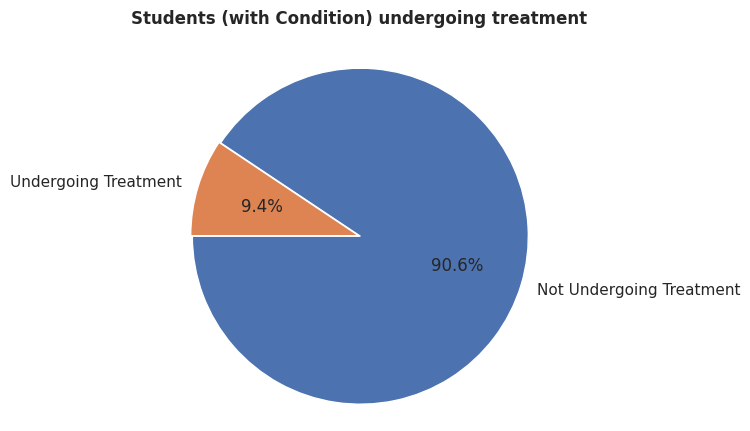

In [43]:
labels = ['Not Undergoing Treatment', 'Undergoing Treatment']

plt.pie(df_condition['Is Undergoing Treatment?'].value_counts(),labels=labels, autopct='%1.1f%%',startangle=180, explode=(0.005,0.005))
plt.axis('equal')
plt.title('Students (with Condition) undergoing treatment', fontsize=12, fontweight='bold', pad=20)
plt.show()

In [44]:
sorted_conditions = df_condition['Condition'].value_counts().index.tolist()

Text(0.5, 1.0, 'Students undergoing treatment by condition')

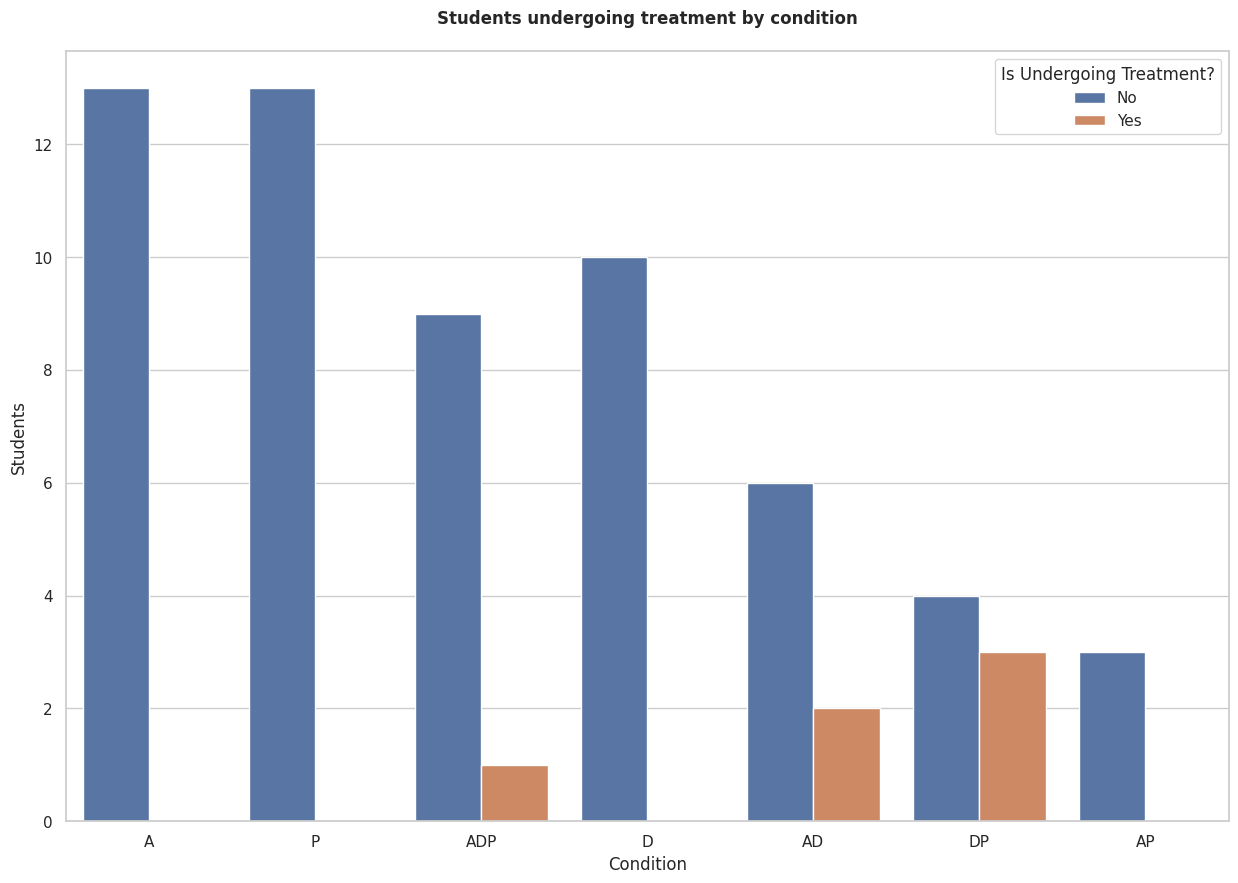

In [45]:
plt.figure(figsize=(15,10))
sns.countplot(data=df_condition, x='Condition',hue='Is Undergoing Treatment?', order=sorted_conditions)

plt.xlabel('Condition')
plt.ylabel('Students')
plt.title('Students undergoing treatment by condition', fontsize=12, fontweight='bold', pad=20)

After analyzing the dataset, we have observed that approximately 1 out of 10 students undergoes treatment. Interestingly, our findings indicate that only students who experience depression seek treatment.

## **Conditions By Gender**

Text(0.5, 1.0, 'Condition by Gender (with a 75 to 25 Female:Male Ratio)')

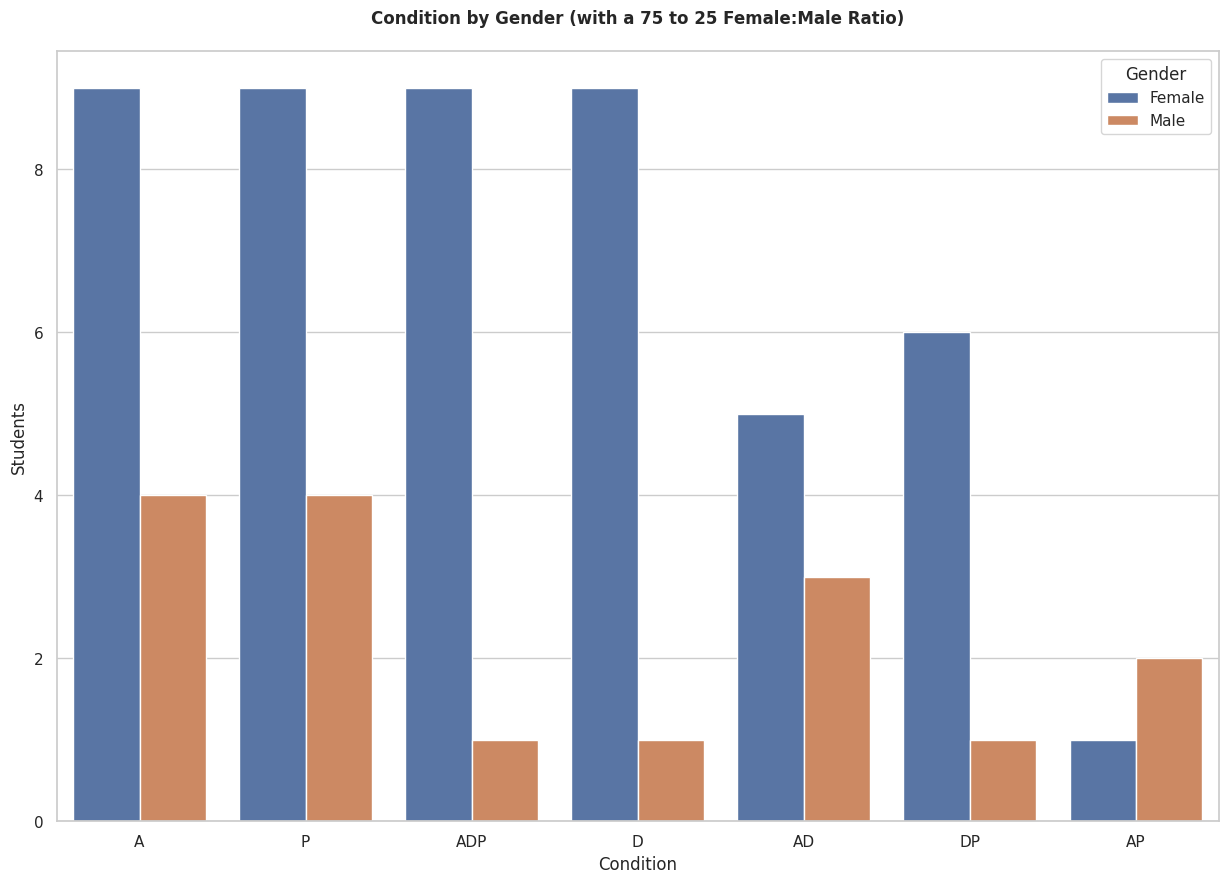

In [46]:
plt.figure(figsize=(15,10))
sns.countplot(data=df_condition, x='Condition',hue='Gender', order=sorted_conditions)

plt.xlabel('Condition')
plt.ylabel('Students')
plt.title('Condition by Gender (with a 75 to 25 Female:Male Ratio)', fontsize=12, fontweight='bold', pad=20)

In [47]:
gender_ratio = df_condition['Gender'].value_counts(normalize=True)

# Grouping by 'Condition' and 'Gender', and counting the occurrences
grouped = df_condition.groupby(['Condition', 'Gender']).size().reset_index(name='Count')
grouped = grouped.merge(gender_ratio.rename('Gender Ratio'), left_on='Gender', right_index=True)

grouped['Count'] = grouped['Count'] / grouped['Gender Ratio']

condition_gender_df = grouped.pivot(index='Condition', columns='Gender', values='Count').reset_index()
condition_gender_df.fillna(0, inplace=True)
condition_gender_df.columns = ['Condition', 'Male', 'Female']

condition_gender_df['Total'] = condition_gender_df['Male'] + condition_gender_df['Female']
condition_gender_df = condition_gender_df.round(2).sort_values('Total', ascending=False)
condition_gender_df

,Condition,Male,Female,Total
0,A,12.00,16.0,28.00
6,P,12.00,16.0,28.00
1,AD,6.67,12.0,18.67
2,ADP,12.00,4.0,16.00
4,D,12.00,4.0,16.00
5,DP,8.00,4.0,12.00
3,AP,1.33,8.0,9.33


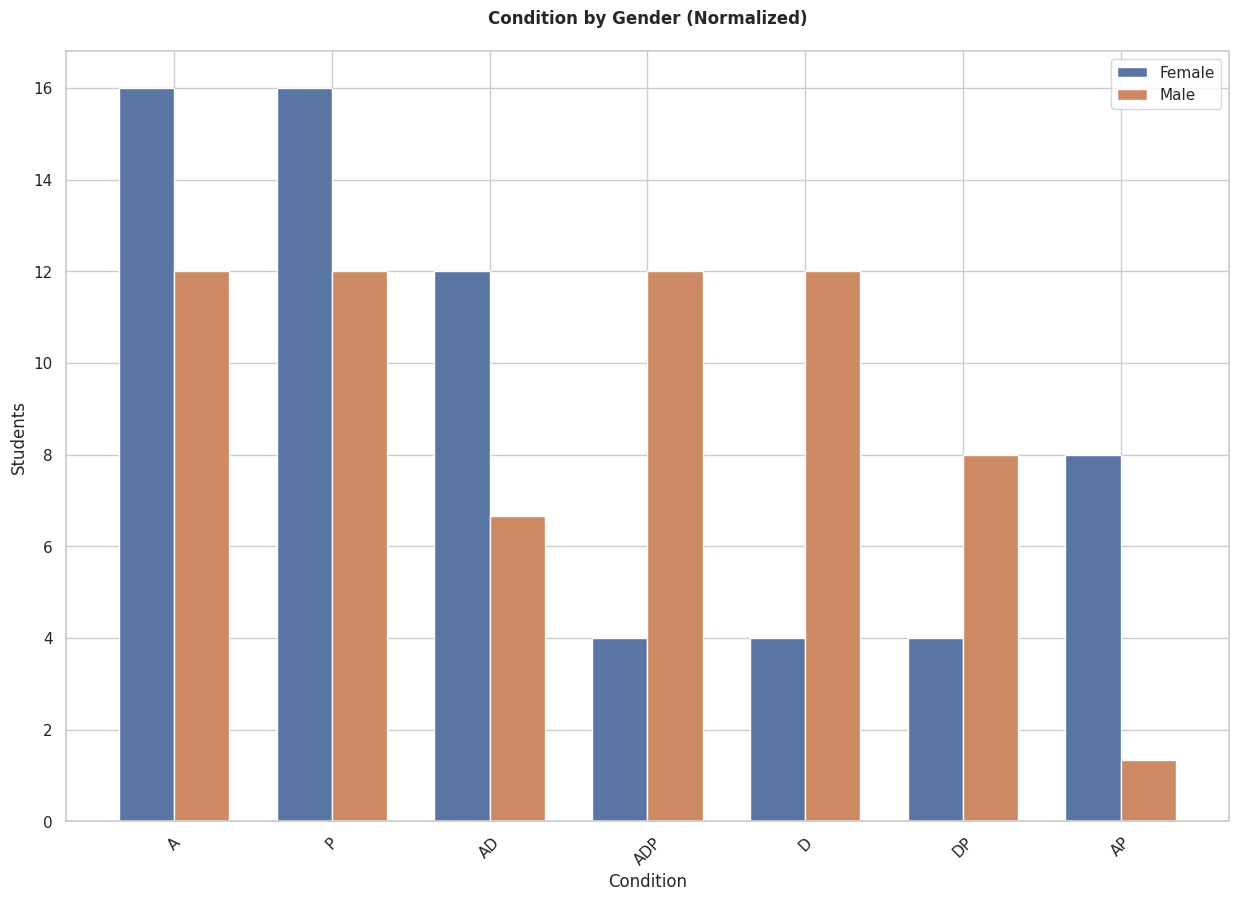

In [48]:
plt.figure(figsize=(15,10))
bar_width = 0.35

condition_indices = np.arange(len(condition_gender_df))

sns.set_style("whitegrid")

plt.bar(condition_indices, condition_gender_df['Female'], width=bar_width, color='#5975a4', label='Female')
plt.bar(condition_indices + bar_width, condition_gender_df['Male'], width=bar_width, color='#cc8963', label='Male')

plt.xticks(condition_indices + bar_width / 2, condition_gender_df['Condition'], rotation=45)

plt.xlabel('Condition')
plt.ylabel('Students')
plt.title('Condition by Gender (Normalized)', fontsize=12, fontweight='bold', pad=20)

# Add a legend
plt.legend()

# Display the plot
plt.show()

Realizing the ratio of Females to Males was about 3 to 1, we normalized the data and were able to discover:

-   The condition **"None"** has an equal distribution of cases between males and females, indicating a lack of specific conditions.
-   Conditions **"AD"** and **"D"** have a higher prevalence among females, suggesting potential gender disparities.
-   Conditions **"ADP"** and **"DP"** have a higher prevalence among males, indicating potential gender disparities.

Please note that these conclusions are based on the normalized data and may not represent the overall population.

# **Conclusions**

- The majority of the students taking the test are females (75%)
- The majority of the students taking the survey are from Year 1 (46%)
- The most common condition is Depression (34.3%) followed by Anxiety (33.3%) and than by Panic Attacks (32.4%)
- The amount of people getting treatment is about 1 to 10 (9.6%)